   total_count  good_count       day  good_rate   类别数目
0     0.551482    0.218078  1.920423   0.023746   5221
1    -0.147884   -0.101802 -0.503180  -0.623075  18183
2    31.010860   34.419395  2.181035   1.494281     18
3    -0.101356    0.012585 -0.124098   1.513675   7385


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/var/folders/r6/jncwg9151xz9kkqq_ky369vw0000gn/T/ipykernel_85202/3776929299.py:42: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  density_plot(data[r[u'聚类类别']==i]).savefig(u'%s%s.png' %(pic_output, i))
/var/folders/r6/jncwg9151xz9kkqq_ky369vw0000gn/T/ipykernel_85202/3776929299.py:42: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  density_plot(data[r[u'聚类类别']==i]).savefig(u'%s%s.png' %(pic_output, i))
/Users/admin/opt/anaconda3/envs/pythonProject1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/opt/anaconda3/envs/pythonProject1/lib/python3.8/site-packages/IPython/core/pylabtools.

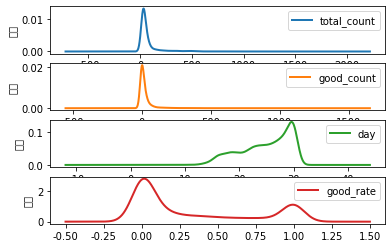

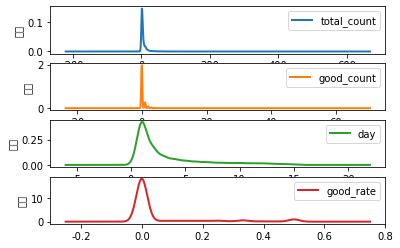

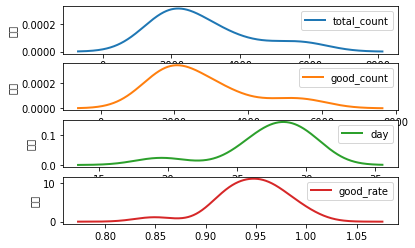

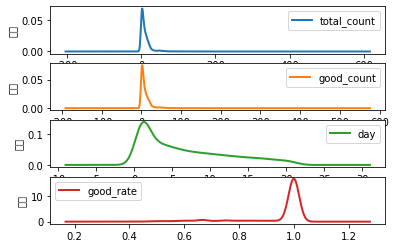

In [1]:
#-*- coding: utf-8 -*-
#使用K-Means算法聚类消费行为特征数据

import pandas as pd

#参数初始化
inputfile = '/Users/admin/PycharmProjects/pythonProject1/Python/K-Means/sv_user.xlsx' #销量及其他属性数据
outputfile = '/Users/admin/PycharmProjects/pythonProject1/Python/K-Means/result.xlsx' #保存结果的文件名
k = 4 #聚类的类别
iteration = 500 #聚类最大循环次数
data = pd.read_excel(inputfile, index_col = 'id') #读取数据
data_zs = 1.0*(data - data.mean())/data.std() #数据标准化

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, max_iter = iteration) #分为k类，并发数4
model.fit(data_zs) #开始聚类

#简单打印结果
r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(data.columns) + [u'类别数目'] #重命名表头
print(r)

#详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(data.columns) + [u'聚类类别'] #重命名表头
r.to_excel(outputfile) #保存结果


def density_plot(data): #自定义作图函数
  import matplotlib.pyplot as plt
  plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签outputfile
  plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
  p = data.plot(kind='kde', linewidth = 2, subplots = True, sharex = False)
  [p[i].set_ylabel(u'密度') for i in range(k)]
  plt.legend()
  return plt

pic_output = '/Users/admin/PycharmProjects/pythonProject1/Python/K-Means/pd_' #概率密度图文件名前缀
for i in range(k):
  density_plot(data[r[u'聚类类别']==i]).savefig(u'%s%s.png' %(pic_output, i))